In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline
#%matplotlib qt

(36, 2)


Text(0.5, 0, 'CO2')

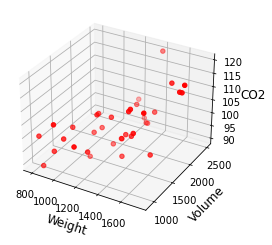

In [ ]:
#%matplotlib qt
df = pd.read_csv('cars.csv')
X = df[['Weight', 'Volume']]
X = X.to_numpy()
y = df['CO2']
y = y.to_numpy()
print(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.set_xlabel('Weight',fontsize=12)
ax.set_ylabel('Volume',fontsize=12)
ax.set_zlabel('CO2',fontsize=12)


## Función objetivo por gradiente descendente clásico


- Ejemplo de hipótesis: regresión lineal 
\begin{equation*}
y=h(\mathbf{x}; \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0+\theta_1x_1+\cdots + \theta_n x_n
\end{equation*}


- Convención para simplificar notación: $x_0={1}$
\begin{equation*}
y=h(\mathbf{x}; \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0x_0+\theta_1x_1+\cdots + \theta_n x_n=\sum_{i=0}^{n}{\theta_{i}x_{i}}
\end{equation*} 
\begin{equation*}
=\boldsymbol{\theta}^T  \mathbf{x}= \langle \boldsymbol{\theta},  \mathbf{x} \rangle= \boldsymbol{\theta} \cdot{}  \mathbf{x}
\end{equation*}
\begin{equation*}
\boldsymbol{\theta} = [\theta_{0},\theta_{1}, \ldots ,\theta_{n}]^T
\end{equation*}  
\begin{equation*}
\boldsymbol{x} = [x_{0},x_{1}, \ldots ,x_{n}]^T
\end{equation*}  


- Para encontrar $\boldsymbol{\theta}$ minimizamos la función de error $J(\boldsymbol{\theta})$ con 
\begin{equation*}
J(\boldsymbol{\theta}) = \frac{1}{2} \sum_{i=1}^{m} ( h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})- y^{(i)} )^2
\end{equation*}

\begin{equation*}
 \boldsymbol{\theta}^{*}= \arg\min_{\boldsymbol{\theta}} \boldsymbol{\theta}
\end{equation*}
Objetivo:
Se buscan parámetros $\boldsymbol{\theta}$ que producen el menor valor de $\boldsymbol{\theta}$

- Para el caso de dos parametros dos características
\begin{equation*}
J(\theta_0,\theta_1,\theta_2) = \frac{1}{2}  \sum_{i=1}^{m}  ( \theta_0+\theta_1 x_{1}^{(i)} +\theta_2 x_{2}^{(i)}- y^{(i)} )^2
\end{equation*}  

### Algoritmo de gradiente descendente  

1.- Tome un valor $\boldsymbol{\theta}^{(0)}$ inicial, t=0

2.- Calcule en   $\boldsymbol{\theta}^{(t)}$ el gradiente (máxima dirección de cambio)
\begin{equation*}
\nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})= \left[ \frac{\partial J}{\partial \theta_{0}}  \frac{\partial J}{\partial \theta_{1}}  \cdots \frac{\partial J}{\partial \theta_{0}} \right]^{T} 
\end{equation*}
3.- Calcule la nueva posición 
\begin{equation*}
{\boldsymbol{\theta}}^{(t+1)}:= {\boldsymbol{\theta}}^{(t)}- \alpha \nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})
\end{equation*}
o de forma equivalente para cada $\theta_{j}, j\in 1, \ldots ,n$
\begin{equation*}
\theta_{j}^{(t+1)}:=\theta_{j}^{(t)}- \alpha \frac{\partial J({\boldsymbol{\theta}}^{(t)})}{\partial \theta_j}
\end{equation*}


In [ ]:
N=len(y)
theta = np.array([[0],[0],[0]])
lr =5e-8
n_iter = 100000
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(X),1)),X]
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_b,theta)
    si=-lr*(x_b.T.dot((pred - y)))
    theta = theta + si;
    
print("Iterations: %d" %it)
print("DG:  \n theta_0=%f \n theta_1=%f, \n theta_2=%f" %(theta[0],theta[1],theta[2]))




C:\Users\coyul\AppData\Local\Temp/ipykernel_22992/3460586070.py:11: RuntimeWarning: invalid value encountered in add
  theta = theta + si;


Iterations: 99999
DG:  
 theta_0=nan 
 theta_1=nan, 
 theta_2=nan


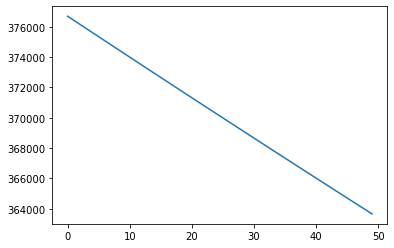

[[   1.51547715   99.          -97.48452285]
 [   1.66416404   95.          -93.33583596]
 [   1.55651509   95.          -93.44348491]
 [   1.51789533   90.          -88.48210467]
 [   1.71743307  105.         -103.28256693]
 [   1.55651509  105.         -103.44348491]
 [   1.68855613   90.          -88.31144387]
 [   1.78386141   92.          -90.21613859]
 [   1.70916644   98.          -96.29083356]
 [   1.74011004   99.          -97.25988996]
 [   1.59129678   99.          -97.40870322]
 [   1.63369833  101.          -99.36630167]
 [   1.61054347   99.          -97.38945653]
 [   1.77022421   94.          -92.22977579]
 [   1.79207175   97.          -95.20792825]
 [   1.7932527    97.          -95.2067473 ]
 [   1.803586     99.          -97.196414  ]
 [   1.89683841  104.         -102.10316159]
 [   1.73095769  104.         -102.26904231]
 [   1.8715606   105.         -103.1284394 ]
 [   1.86824291   94.          -92.13175709]
 [   1.9010843    99.          -97.0989157 ]
 [   1.902

In [ ]:
#Standardization using z-score
x_b = np.c_[np.ones((len(X),1)),X]
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std

#Standardization  
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# StandardScaler()
# x_b_s=scaler.transform(X)
# x_b_s = np.c_[np.ones((len(x_b_s),1)),x_b_s]
# print(np.c_[x_b_s, x_bs])
# fig, (ax1, ax2) = plt.subplots(2)
# ax1.plot(x_b[:,1])
# ax2.plot(x_b_s[:,1]) 

N=len(y)
theta = np.array([[0],[0],[0]])
ep=1e-4
lr =1e-5
n_iter = 50000
j_cost= np.zeros([n_iter])
y=y.reshape((len(y), 1))
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_bs,theta)
    h=(pred - y)
    si=-lr*(x_bs.T.dot(h))
    theta = theta + si;
    j_cost[it]=np.sum(np.square(h))
    
#     if LA.norm(si)<ep:
#         break;

fig = plt.figure()
plt.plot(j_cost)
plt.show()
print(np.c_[pred,y,h])
print("Iterations: %d" %it)
print("DG:  \n theta_0=%f \n theta_1=%f, \n theta_2=%f" %(theta[0],theta[1],theta[2]))



In [ ]:
%matplotlib qt

xc = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.01)
yc = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.01)
plane=np.zeros([len(xc),len(yc)])

for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j]=np.dot(np.c_[1,xc[i],yc[j]],theta)
B, M = np.meshgrid(yc, xc)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel('Weight',fontsize=12)
ax.set_ylabel('Volume',fontsize=12)
ax.set_zlabel('CO2',fontsize=12)


Text(0.5, 0, 'CO2')